<a href="https://colab.research.google.com/github/iambrookedrake/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/Brooke_Drake_DSPT6_U1S2M2_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chisquare, normaltest, kruskal, ttest_ind, t, ttest_1samp

In [175]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data --no-check-certificate

--2020-04-14 00:01:00--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.3’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2020-04-14 00:01:00 (590 KB/s) - ‘house-votes-84.data.3’ saved [18171/18171]



In [0]:
#name columns
columns = ['party', 'handicapped-infants', 'water-project-cost-sharing', 
           'adoption-of-the-budget-resolution', 'physician-fee-freeze', 
           'el-salvador-aid', 'religious-groups-in-schools', 
           'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
           'immigration', 'synfuels-corporation-cutback', 'education-spending', 
           'superfund-right-to-sue', 'crime', 'duty-free-exports', 
           'export-administration-act-south-africa']

In [177]:
# convert y/n to 1/0 and adjust Nan
votes = pd.read_csv('house-votes-84.data', header=None, names=columns)
votes = votes.replace({'y':1, 'n':0,'?':np.nan})
print(votes.shape)
votes.head()

(435, 17)


,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [178]:
#subset Republicans
rep = votes[votes['party']=='republican']
print(rep.shape)
rep.head()

(168, 17)


,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [179]:
# Subset Democrats
dem = votes[votes['party']=='democrat']
print(dem.shape)
dem.head()

(267, 17)


,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [0]:
#Define confidence interval
def conf_interval(data, confidence=0.95):
    data = np.array(data)
    mean = np.nanmean(data)
    n = data.shape[0]
    stderr = np.nanstd(data, ddof=1)/np.sqrt(n)
    moe = stderr*stats.t.ppf((1 - confidence)/2.0, n-1)
    return (mean, mean-moe, mean+moe) # mean, upper bound, lower bound.

In [181]:
# Mean of Dem Yesses
yesD = []
for column in dem:
  if column !='party': 
    yesD.append(dem[column].mean())
print(yesD)

[0.6046511627906976, 0.502092050209205, 0.8884615384615384, 0.05405405405405406, 0.21568627450980393, 0.47674418604651164, 0.7722007722007722, 0.8288973384030418, 0.7580645161290323, 0.4714828897338403, 0.5058823529411764, 0.14457831325301204, 0.2896825396825397, 0.35019455252918286, 0.6374501992031872, 0.9351351351351351]


In [182]:
#Mean of Rep Yesses
yesR = []
for column in rep:
  if column !='party': 
    yesR.append(rep[column].mean())
print(yesR)

[0.18787878787878787, 0.5067567567567568, 0.13414634146341464, 0.9878787878787879, 0.9515151515151515, 0.8975903614457831, 0.24074074074074073, 0.15286624203821655, 0.11515151515151516, 0.5575757575757576, 0.1320754716981132, 0.8709677419354839, 0.8607594936708861, 0.9813664596273292, 0.08974358974358974, 0.6575342465753424]


In [183]:
conf_interval(yesR)

(0.5202842153559785, 0.7144595054890542, 0.3261089252229027)

In [184]:
conf_interval(yesD)

(0.5272036172051706, 0.670265514713119, 0.3841417196972222)

In [185]:
CID = t.interval(.95, dem.shape[0]-1)
CID

(-1.9689223241409017, 1.9689223241409017)

In [186]:
CIR = t.interval(.95, rep.shape[0]-1)
CIR

(-1.9742709570223844, 1.9742709570223844)

(0.5272036172051706, 0.670265514713119, 0.3841417196972222)


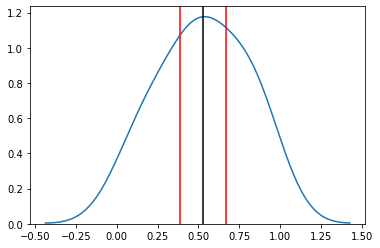

In [187]:
sns.kdeplot(yesD)
CI = conf_interval(yesD)
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='black')
print(CI)

(0.5202842153559785, 0.7144595054890542, 0.3261089252229027)


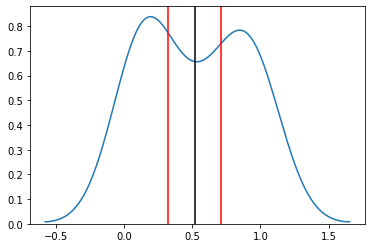

In [188]:
sns.kdeplot(yesR)
CI = conf_interval(yesR)
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='black')
print(CI)

In [189]:
dem.describe()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,258.000000,239.000000,260.000000,259.000000,255.000000,258.000000,259.000000,263.000000,248.000000,263.000000,255.000000,249.000000,252.000000,257.000000,251.000000,185.000000
mean,0.604651,0.502092,0.888462,0.054054,0.215686,0.476744,0.772201,0.828897,0.758065,0.471483,0.505882,0.144578,0.289683,0.350195,0.637450,0.935135
std,0.489876,0.501045,0.315405,0.226562,0.412106,0.500430,0.420224,0.377317,0.429121,0.500138,0.500949,0.352383,0.454518,0.477962,0.481697,0.246956
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [190]:
rep.describe()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,165.000000,148.000000,164.000000,165.000000,165.000000,166.000000,162.000000,157.000000,165.000000,165.000000,159.000000,155.000000,158.000000,161.000000,156.000000,146.000000
mean,0.187879,0.506757,0.134146,0.987879,0.951515,0.897590,0.240741,0.152866,0.115152,0.557576,0.132075,0.870968,0.860759,0.981366,0.089744,0.657534
std,0.391804,0.501652,0.341853,0.109760,0.215442,0.304104,0.428859,0.361010,0.320176,0.498186,0.339643,0.336322,0.347298,0.135649,0.286735,0.476168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [191]:
conf_interval(dem['water-project-cost-sharing'])

(0.502092050209205, 0.5624660052742062, 0.4417180951442038)

(0.502092050209205, 0.5624660052742062, 0.4417180951442038)


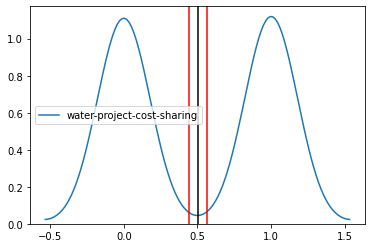

In [192]:
sns.kdeplot(dem['water-project-cost-sharing'])
CI2 = conf_interval(dem['water-project-cost-sharing'])
plt.axvline(x=CI2[1], color='red')
plt.axvline(x=CI2[2], color='red')
plt.axvline(x=CI2[0], color='black')
print(CI2)

#3 Interpretation
* Members of both parties are slightly more likely to vote FOR a given issue than against it
* Republicans are more likely to vote the same as each other, ie along party lines, than democrats are
* Democrat vote outcomes are less predictable than republican outcomes


* Democrats are split on water-project-cost-sharing

#4


In [193]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [194]:
df.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [195]:
cross = pd.crosstab(df['sex'], df['marital-status'], margins=True)
cross

marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,All
sex,,,,,,,,
Female,2672,14,1657,205,4767,631,825,10771
Male,1771,9,13319,213,5916,394,168,21790
All,4443,23,14976,418,10683,1025,993,32561


In [196]:
# Run chi_square using numpy
chisquare(cross)

Power_divergenceResult(statistic=array([1.24778596e+03, 6.56521739e+00, 1.05550098e+04, 1.04614833e+02,
       2.76343471e+03, 2.97349268e+02, 5.74268882e+02, 1.09369630e+04]), pvalue=array([1.11358271e-271, 3.75302241e-002, 0.00000000e+000, 1.91945419e-023,
       0.00000000e+000, 2.70039187e-065, 1.99111650e-125, 0.00000000e+000]))

In [197]:
femalecount = cross.iloc[0][0:7].values
femalecount

array([2672,   14, 1657,  205, 4767,  631,  825])

In [198]:
malecount = cross.iloc[1][0:7].values
malecount

array([ 1771,     9, 13319,   213,  5916,   394,   168])

In [199]:
row_sums = cross.iloc[0:2, 7].values
col_sums = cross.iloc[2, 0:7].values

print(row_sums)
print(col_sums)

[10771 21790]
[ 4443    23 14976   418 10683  1025   993]


In [200]:
total = cross.loc['All','All']
total

32561

In [201]:
expected = []
for i in range(len(row_sums)):
    expected_row = []
    for column in col_sums:
        expected_val = column*row_sums[i]/total
        expected_row.append(expected_val)
    expected.append(expected_row)
    
expected = np.array(expected)
print(expected.shape)  
print(expected)

(2, 7)
[[1.46972000e+03 7.60827370e+00 4.95397856e+03 1.38272105e+02
  3.53387774e+03 3.39064371e+02 3.28478947e+02]
 [2.97328000e+03 1.53917263e+01 1.00220214e+04 2.79727895e+02
  7.14912226e+03 6.85935629e+02 6.64521053e+02]]


In [202]:
observed = pd.crosstab(df['sex'], df['marital-status']).values
print(observed.shape)
observed

(2, 7)


array([[ 2672,    14,  1657,   205,  4767,   631,   825],
       [ 1771,     9, 13319,   213,  5916,   394,   168]])

In [203]:
chi_squared = ((observed - expected)**2/(expected)).sum() 
print(f"Chi-Squared: {chi_squared}")

Chi-Squared: 6944.747255715985


In [204]:
dof = (len(row_sums)-1)*(len(col_sums)-1)
print(f"Degrees of Freedom: {dof}")

Degrees of Freedom: 6


In [205]:
# Run chi_square using scipy
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))



Chi-Squared: 6944.747255715985
P-value: 0.0
Degrees of Freedom: 6
Expected: 
 [[1.46972000e+03 7.60827370e+00 4.95397856e+03 1.38272105e+02
  3.53387774e+03 3.39064371e+02 3.28478947e+02]
 [2.97328000e+03 1.53917263e+01 1.00220214e+04 2.79727895e+02
  7.14912226e+03 6.85935629e+02 6.64521053e+02]]



Interpretation:

Null Hypothesis: [marital-status] is independent of [sex].

Due to a p-value of 0, we REJECT the null hypothesis that marital-status and sex are independent, and conclude that there is an association between marital-status and sex.


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)